# Students adaptability to Remote Learning

Online Education was suddenly a reality for 2 (or more) years for some students during COVID. It allowed students to connect with teachers and colleagues from the safety of their home. Contrary to some institutions and countries who could adapt pretty quickly to this new reality, students from developing countries were the most affected by this change. Government and Education Insitutions were, for the most part, not prepared to adapt to this new reality.

But it was not just education institutions or governments that were affected. A big share of students had to adapt to learn, most of the times, through a phone or tablet. The following dataset was created to study the adaptability of students to Online Learning. The surveys were conducted in Bangladesh. The dataset can be found in Kaggle [HERE](https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education) and the Conference Paper generated by the authors can be found [HERE](https://www.researchgate.net/publication/355891881_Students'_Adaptability_Level_Prediction_in_Online_Education_using_Machine_Learning_Approaches).

If we know how to predict the adaptability of students to Online Learning, that would allow Governments, schools, universities, etc. to act faster and in a more personalized way to try to answer these limitations of online learning.


## Main Question - Can we use Machine Learning to Predict Student Adaptability to Online Learning? What are the most important features for this problem?

## Imports

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE 

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline

In [46]:
student_data = pd.read_csv('students_adaptability_level_online_education.csv')

## Data Exploration and Analysis

In [47]:
student_data.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


In [48]:
# seeing if data has any missing values
student_data.isnull().values.any()

False

In [49]:
student_data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [50]:
student_data['Adaptivity Level'].value_counts(normalize=True)

Moderate    0.518672
Low         0.398340
High        0.082988
Name: Adaptivity Level, dtype: float64

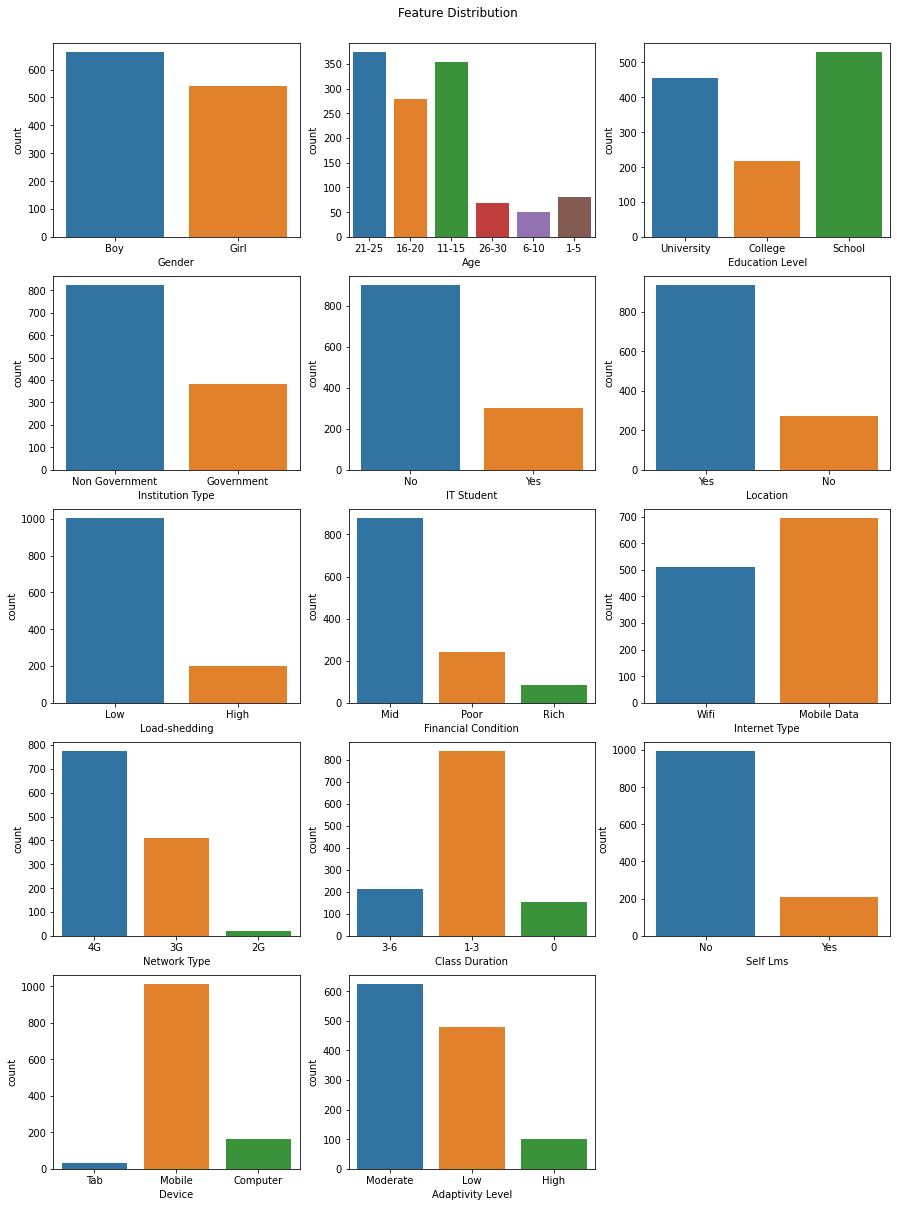

In [51]:
i = 1
plt.figure(figsize = (15,25))
plt.suptitle('Feature Distribution', y=0.9);
for column in student_data:
    plt.subplot(6,3,i)
    sns.countplot(x = column,  data = student_data)
    i +=1

Takeaways:

- Most students in our dataset are from 11-25 years old. 
- A great part of the students use mobile data instead of Wifi. Furthermore, a majority of them use a mobile device like their smartphone instead of a computer.
- Most of the students are from the middle class in terms of financial condition.
- The class duration is mostly 1 to 3 hours a day.
- Most education institutions are Private.
- The Majority of students are still in the location where the education institution is located.
- Most of the students are not IT students.
- **Only 8% of the students are had a High Adaptativity Level to Remote Learning.**

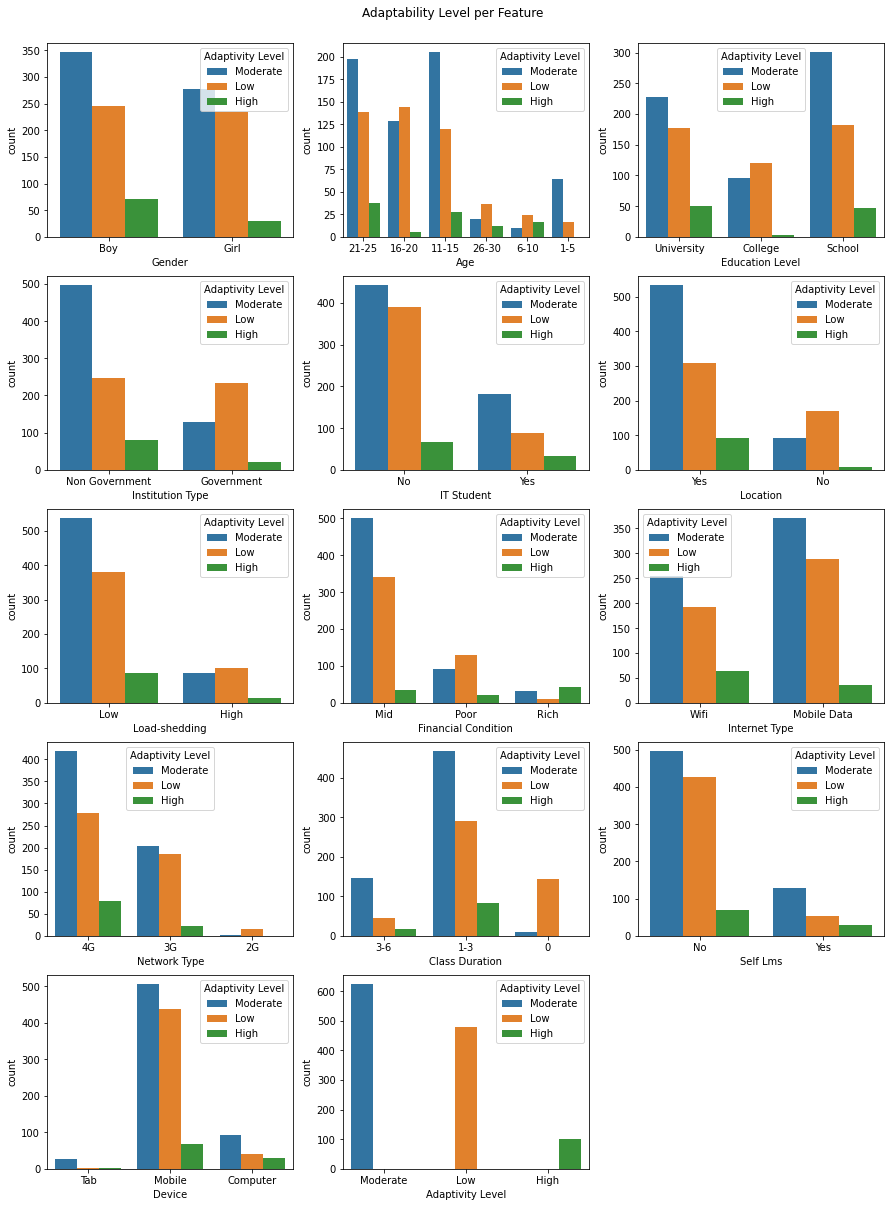

In [52]:
i = 1
plt.figure(figsize = (15,25))
plt.suptitle('Adaptability Level per Feature', y=0.9);
for column in student_data:
    plt.subplot(6,3,i)
    sns.countplot(x = column , hue='Adaptivity Level',  data = student_data)
    i +=1

Takeaways:

- In this sample, boys have a bigger Adaptability Level, for some reason.
- 16-20 years old have a special hard time adapting, when compared to 21-25 and 11-15.
- If the students are from IT, they have more capability of adapting.
- The level od adaptability depends a lot on the Network Type. The faster it is, the better adaptability. Network Type is correlated with the adaptability level. 
- The Higher the financial support, the better the adaptability.
- The Adaptability level also depends on the Education Level.

#### What if we could predict the Adaptability Level of a Student based on these available features?

In this case, our X will be all the columns that we have in our dataset, except for Adaptivity Level. Our Y will be the Adaptability Level. Let's see if we can predict Adaptivity Level based on the available X.

## Feature Engineering/Data Preparation for Machine Learning

In [53]:
student_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [54]:
# Let's take out the spaces between words
student_data.columns = student_data.columns.str.replace(' ', '_')
features = student_data.columns.tolist()
features

['Gender',
 'Age',
 'Education_Level',
 'Institution_Type',
 'IT_Student',
 'Location',
 'Load-shedding',
 'Financial_Condition',
 'Internet_Type',
 'Network_Type',
 'Class_Duration',
 'Self_Lms',
 'Device',
 'Adaptivity_Level']

In [55]:
# Using sklearn to encode the categorical data
# Into our model, there can only enter, or be inputted, numerical data. So we need to take the categorical data and encode it into numerical data.
labeler = LabelEncoder()

# for every feature, create a new column with the encoded data. This new column will have the column name with the _transformed suffix
for feature in features:
    student_data[f'{feature}_transformed'] = labeler.fit_transform(student_data[feature])

student_data.head()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load-shedding,Financial_Condition,Internet_Type,Network_Type,...,IT_Student_transformed,Location_transformed,Load-shedding_transformed,Financial_Condition_transformed,Internet_Type_transformed,Network_Type_transformed,Class_Duration_transformed,Self_Lms_transformed,Device_transformed,Adaptivity_Level_transformed
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,...,0,1,1,0,1,2,2,0,2,2
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,...,0,1,0,0,0,2,1,1,1,2
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,...,0,1,1,0,1,2,1,0,1,2
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,...,0,1,1,0,0,2,1,0,1,2
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,...,0,1,1,1,0,1,0,0,1,1


In [56]:
student_data[['Gender', 'Gender_transformed']].head()

,Gender,Gender_transformed
0,Boy,0
1,Girl,1
2,Girl,1
3,Girl,1
4,Girl,1


In [57]:
transformed_df = student_data[student_data.columns[14:]]

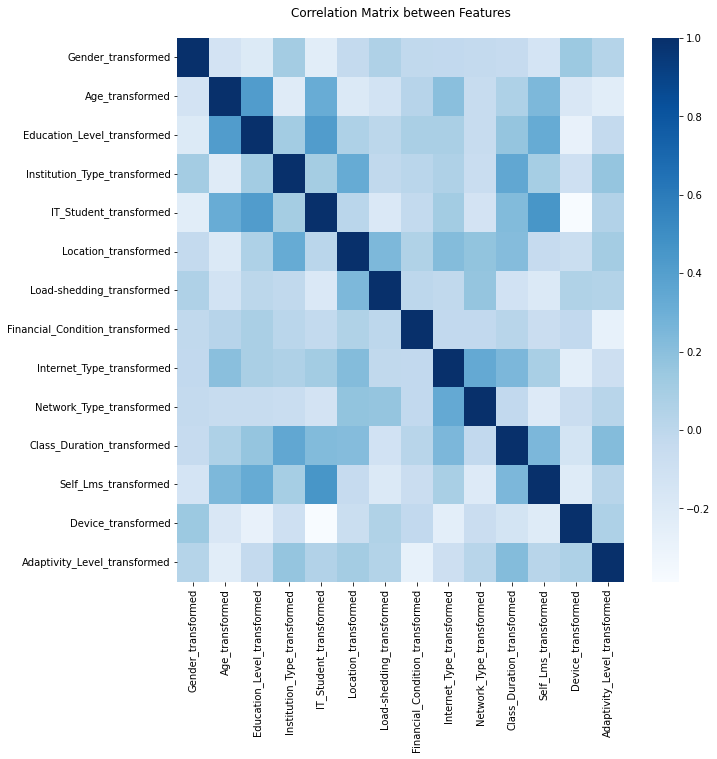

In [58]:
import seaborn as sns
corr = transformed_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation Matrix between Features\n')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax,
            cmap="Blues",);

### Takeaways from Correlation Matrix

As the data shows, it seems that there is no relation at all between important or less important features and the target. 

In [60]:
y_mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
y_mapping

{'High': 0, 'Low': 1, 'Moderate': 2}

In [62]:
# summarize the new class distribution
counter = Counter(transformed_df["Adaptivity_Level_transformed"])
print(counter)

Counter({2: 625, 1: 480, 0: 100})


#### Oversampling the dataset because the data is unbalanced: the number of highs is too little when compared to the "Low" and "Moderate" Level. 

In [63]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(transformed_df.drop('Adaptivity_Level_transformed', axis=1), transformed_df["Adaptivity_Level_transformed"])

In [65]:
# summarize the new class distribution
counter = Counter(labels)
print(counter)

Counter({2: 625, 1: 625, 0: 625})


In [66]:
# split into train and test datasets
X_train, X_test, y_train, y_test=train_test_split(features, labels,test_size=0.33,random_state=42)

## Modelling

Trying different models and seeing which one performs better in this specific problem.

In [67]:
# the models we want to evaluate and compare
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(), GaussianNB(), SVC(), GradientBoostingClassifier()]
scores = dict()

In [68]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'model: {str(model)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*60, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       214
           1       0.91      0.91      0.91       207
           2       0.91      0.80      0.85       198

    accuracy                           0.91       619
   macro avg       0.91      0.90      0.90       619
weighted avg       0.91      0.91      0.90       619

------------------------------------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       214
           1       0.85      0.86      0.85       207
           2       0.87      0.70      0.78       198

    accuracy                           0.85       619
   macro avg       0.85      0.84      0.84       619
weighted avg       0.85      0.85      0.84       619

------------------------------------------------------------ 

model: SVC()
              precision    recall  f1

In [69]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       214
           1       0.92      0.90      0.91       207
           2       0.91      0.81      0.86       198

    accuracy                           0.91       619
   macro avg       0.91      0.90      0.90       619
weighted avg       0.91      0.91      0.90       619



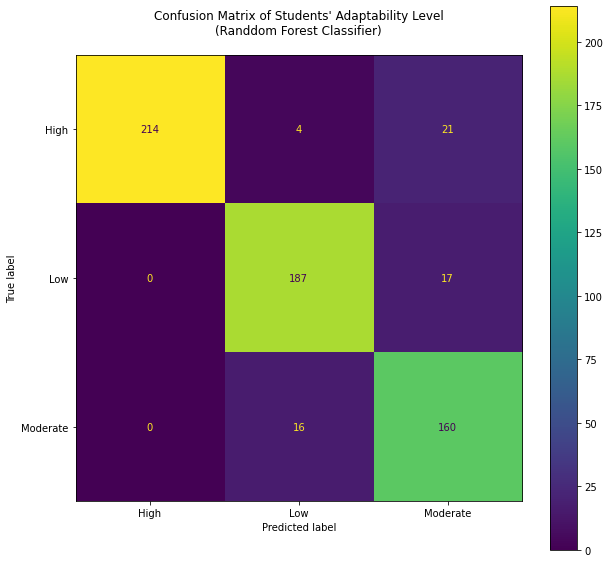

In [70]:
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.title("Confusion Matrix of Students' Adaptability Level\n(Randdom Forest Classifier)\n")
plt.show()

In [71]:
y_pred = model.predict(X_test.head(15))
print(y_test.head(15).values)
print(y_pred)
print(y_mapping)

[2 0 1 2 1 0 0 2 0 0 2 1 2 1 1]
[2 0 1 2 1 0 0 2 0 0 2 1 2 1 1]
{'High': 0, 'Low': 1, 'Moderate': 2}


In [72]:
feature_importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
7,Financial_Condition_transformed,0.155974
1,Age_transformed,0.146641
10,Class_Duration_transformed,0.134068
0,Gender_transformed,0.073328
9,Network_Type_transformed,0.068132
3,Institution_Type_transformed,0.067714
2,Education_Level_transformed,0.059317
5,Location_transformed,0.057289
12,Device_transformed,0.053066
11,Self_Lms_transformed,0.052798


### Conclusion

It seems we can predict with some accuracy what are the students which can adapt better to online learning. Financial Condition, Age and Class Duration seem to be the most important features for this problem, at least for the final model used. 

Looking at the problem and the research done on it, these results seem to be accurate. Financial Condition, Age and Class Duration have all been subject of different studies and researches to see if they impact the academic performance of students, but not many studies have been done about these subjects on K-12 students and in respect to Online Learning.

In terms of technical conclusions, out of all the tested models, the best model for this problem is the Random Forest Classifier. It has the best accuracy and the best F1 Score.

Questions one could ask and analyze further with more time:

- Why are users using a mobile device instead of a computer for classes?
- Does Location influence adaptability?
- Does the Number of Classes influence adaptability?
- Is there any difference between government institutions and non-government institutions?
- Are IT students better at adapting than others?
- Does the Financial Condition influence results and adaptability?


Limitations:

- Dataset is limited so we had to oversample it;
- Other important features might be missings (how was their academic performance before being remote? Do they live in a big or small house? etc)
- No information about the teacher capability of teaching remotely.
- Correlation doesn't imply causality. Maybe it's not about network type, maybe network type is closely tied with economic situation and that's the real factor.

Future Work:

- Finetune Models;
- Try other models.
- Make the bridge with other studies and researches about the impact of Age, Class Duration, Financial Condition, etc. on students academic performance.
- Study more the impact of the teacher capability of teaching remotely.